In [2]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 13.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Read Data
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA          FB       TSLA          FB       TSLA   
Date                                                                  
2018-01-02  64.106003  181.419998  64.106003  181.419998  64.421997   
2018-01-03  63.450001  184.669998  63.450001  184.669998  65.050003   
2018-01-04  62.924000  184.330002  62.924000  184.330002  63.709999   
2018-01-05  63.316002  186.850006  63.316002  186.850006  63.448002   
2018-01-08  67.281998  188.279999  67.281998  188.279999  67.403999   

Attributes                    Low                   Open              \
Symbols             FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.580002  62.200001  177.550003  62.400002  177.679993   
2018-01-03  184.779999  63.110001  181.330002  64.199997  181.880005   
2018-01-04  186.210007  61.136002  184.100006  62.574001  184.899994   
2018-01-05  186.899994  62.400002  184.929993  63.324001  185.589996   
2018-01-08  188.899994  63.099998  186.330002  63.200001  187.199997   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2018-01-02  21761000  18151900  
2018-01-03  22607500  16886600  
2018-01-04  49731500  13880900  
2018-01-05  22956000  13574500  
2018-01-08  49297000  17994700

As you can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘**Adj Close**’ column. This colum gives us the closing price of company’s stock on the given day.

In [4]:
# Closing price
test = test['Adj Close']
test.head()


Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,181.419998
2018-01-03,63.450001,184.669998
2018-01-04,62.924000,184.330002
2018-01-05,63.316002,186.850006
2018-01-08,67.281998,188.279999


Calculate percentage change in stock prices

In [5]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

In [6]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483734269334596

In [7]:
# Log of percentage change
facebook = test['FB'].pct_change().apply(lambda x: np.log(1+x))
facebook.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [8]:
# Variance
var_facebook = facebook.var()
var_facebook

0.00045697258417022536

Volatility is measured as the standard deviation of a company’s stock.

In [9]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
facebook_vol = np.sqrt(var_facebook * 250)
tesla_vol, facebook_vol

(0.5358109337568289, 0.33799873674698305)

We can plot the volatility of both Tesla and Facebook for better visualization.



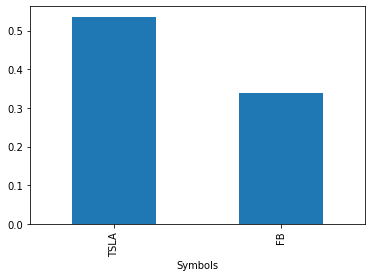

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

Covariance
Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [12]:
# Covariance
test1['TSLA'].cov(test1['FB'])

0.0001826162315603096

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [13]:
test1['TSLA'].corr(test1['FB'])

0.2520883272466129

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns

In [14]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.0003027691524101118